In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import string
import pandas as pd
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

Import data

In [2]:

df_train= pd.read_excel(open(r'C:\Users\Mhaiskao\Desktop\Assignments\Internship\Websites.xlsx','rb'))  

In [3]:
df_train

,Website,Descp
0,Gitlab.com,“From project planning and source code managem...
1,Cloudbees.com,"“Reduce risk, optimize software delivery and a..."
2,squarespace..com,“Squarespace is the all-in-one solution for an...
3,Wix.com,“Create a free website with Wix.com. Choose a...
4,Salesforce CRM,Salesforce helps businesses of all sizes accel...
5,HubSpot CRM,HubSpot is a leading growth platform. Since 20...
6,Freshsales,Freshsales is a sales CRM software by Freshwor...
7,Zoho CRM,"Zoho CRM is a cloud-based, integrated customer..."
8,Pipedrive,Pipedrive is a sales management tool for small...


Preprocessing and tokenizing

In [4]:
#Change all words to lower case
df_train['Descp']=df_train['Descp'].str.lower()

#Remove punctuations and special characters
df_train['Descp'] = df_train['Descp'].str.replace("[\.\,\!\?\:\;\-\=\"\’\'\@\+\~\“\”]","")


def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [5]:
all_text=list(df_train['Descp'])

all_text

['from project planning and source code management to ci/cd and\nmonitoring gitlab is a complete devops platform delivered as a single application only\ngitlab enables concurrent devops to make the software lifecycle 200% faster',
 'reduce risk optimize software delivery and accelerate innovation with\ncloudbees  the industryleading devops technology platform build stuff that matters',
 'squarespace is the allinone solution for anyone looking to create a\nbeautiful website domains ecommerce hosting galleries analytics and 24/7 support all\nincluded',
 ' create a free website with wixcom choose a stunning template and\ncustomize anything with the wix website builder—no coding skills needed create yours\ntoday',
 'salesforce helps businesses of all sizes accelerate sales automate tasks and make smarter decisions so you can grow your business faster salesforce crm offers  lead & contact management  sales opportunity management  workflow rules & automation  customizable reports & dashboard

calculate tf-idf for this corpus

In [14]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

train kmeans model with k = 2

In [15]:
kmeans = KMeans(n_clusters=3).fit(tfidf)

Visualize the Clusters

In [16]:
k = 3
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf)

In [17]:
tfs_embedded = TSNE(n_components=2, perplexity=5, verbose=2).fit_transform(tfs_reduced)


[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.000s...
[t-SNE] Computed neighbors for 9 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 0.531904
[t-SNE] Computed conditional probabilities in 0.000s
[t-SNE] Iteration 50: error = 44.8448334, gradient norm = 0.1929556 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 41.3538818, gradient norm = 0.1411644 (50 iterations in 0.006s)
[t-SNE] Iteration 150: error = 90.3233795, gradient norm = 0.2820180 (50 iterations in 0.007s)
[t-SNE] Iteration 200: error = 51.3874359, gradient norm = 0.1427260 (50 iterations in 0.006s)
[t-SNE] Iteration 250: error = 42.0790291, gradient norm = 0.2052802 (50 iterations in 0.005s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.079029
[t-SNE] Iteration 300: error = 0.1202346, gradient norm = 0.0013597 (50 iterations in 0.006s)
[t-SNE] Iteration 350: error = 0.0661073, gradient norm = 0.0004913 (50 iterat

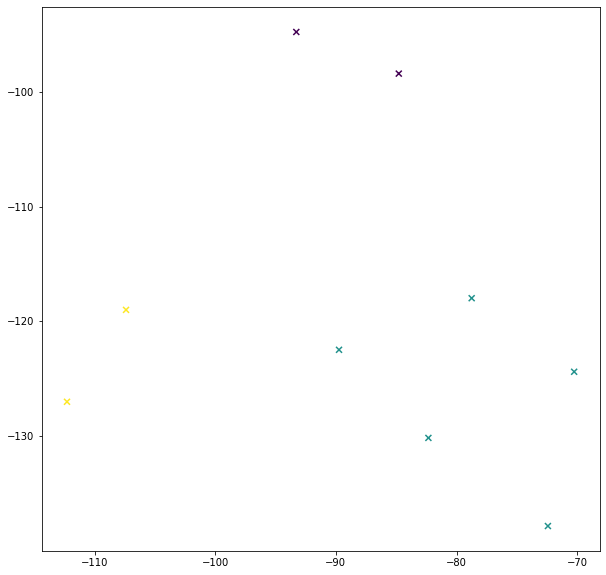

In [18]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans.labels_)
plt.show()

Assign Cluster for all trianing data

In [19]:
lines_for_predicting = all_text
training_data_cluster=kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

In [20]:
training_data_cluster

array([0, 0, 2, 2, 1, 1, 1, 1, 1])

In [21]:
df_train['Cluster']=pd.Series(training_data_cluster)

Predictions on test data

In [22]:

def recommend(input_website):
    input_website_index=df_train.index[df_train['Website']==input_website].tolist()
    description=df_train['Descp'][input_website_index[0]]
    lines_for_predicting = [description]
    test_data_cluster=kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))
    index_list=df_train.index[df_train['Cluster']==test_data_cluster[0]].tolist()
    return index_list,input_website_index
    

In [23]:
index_list,input_website_index=recommend('Zoho CRM')


print('Similar Websites:')
for i in index_list:
    if i == input_website_index[0]:
        continue
    else:
        print(df_train['Website'][i])

Similar Websites:
Salesforce CRM
HubSpot CRM
Freshsales
Pipedrive
